# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Rizki Utama Fauzi
- **Email:** rizkiutamafauzi@gmail.com
- **ID Dicoding:** rizuki_uf

## Menentukan Pertanyaan Bisnis

- What is the trend of bike rental usage each month, and is there an increase from the first year to the second year?
- How does the season affect the number of bike rentals, both casual and registered?
- What is the comparison of bike rental usage between days of the week, between holiday and non-holiday, and between workingday and non-workingday?
- What is the impact of weather conditions, temperature, humidity, and wind speed, on the bike rental rate?
- What is the distribution of bike rental per hour between days of the week and between seasons?

## Import Semua Packages/Library yang Digunakan

Here are all the packages/libraries that will be used in this project.

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

I will be using the Bike-sharing-dataset for this project. The dataset consists of two CSV files, namely **day.csv** and **hour.csv**.

In [142]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [143]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Both **hour.csv** and **day.csv** have the following fields, except *hr* which is not available in **day.csv**
- *instant*: record index
- *dteday* : date
- *season* : season (1:springer, 2:summer, 3:fall, 4:winter)
- *yr* : year (0: 2011, 1:2012)
- *mnth* : month ( 1 to 12)
- *hr* : hour (0 to 23)
- *holiday* : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- *weekday* : day of the week
- *workingday* : if day is neither weekend nor holiday is 1, otherwise is 0.
+ *weathersit* : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- *temp* : Normalized temperature in Celsius. The values are divided to 41 (max)
- *atemp*: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- *hum*: Normalized humidity. The values are divided to 100 (max)
- *windspeed*: Normalized wind speed. The values are divided to 67 (max)
- *casual*: count of casual users
- *registered*: count of registered users
- *cnt*: count of total rental bikes including both casual and registered

### Concern with the Dataset
*I suspect there might be an error in the description of the 'season' column. For instance, in the data for the month of January, all entries are marked as season 1 (Spring). However, according to the information I gathered from a Google search, this does not align with the seasonal conditions at the location from which this dataset was sourced; it should actually be Winter.*

*Nevertheless, I will proceed with using the dataset as is, adhering to the provided descriptions. This is because rectifying this issue would require a significant amount of time.*

### Assessing Data

#### Menilai tabel **day_df**

##### Checking column information

In [144]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


We can observe that there is one column with an inappropriate data type, which is *'dteday'*, currently of type object, but it should be datetime.
As a note, I will leave the integer data type for categorical columns that are already set with numeric/integer values.

##### Checking the number of unique values

In [145]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

Each column has a number of unique values consistent with the information provided in the description. Although there is one column 'weathersit' that shows only 3 unique values, whereas in the description there are 4. This makes sense because this table is an aggregation result from the hour table data. *Based on the data, the dominant weather condition within a day never falls into extremely severe weather*.

##### Checking for missing values

In [146]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The result obtained shows that no missing values were found.

##### Checking for duplicate data

In [147]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


The result obtained shows that no duplicate data was found.

##### Checking for data anomalies

In [148]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


The dataset description results did not reveal any data anomalies.

#### Menilai tabel hour_df

##### Checking column information

In [149]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


We can observe that there is one column with an inappropriate data type, which is *'dteday'*, currently of type object, but it should be datetime.
As a note, I will leave the integer data type for categorical columns that are already set with numeric/integer values.

##### Checking the number of unique values

In [150]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

Each column has a number of unique values consistent with the information provided in the description.

##### Checking for missing values

In [151]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The result obtained shows that no missing values were found.

##### Checking for duplicate data

In [152]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


The result obtained shows that no duplicate data was found.

##### Checking for data anomalies

In [153]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The dataset description results did not reveal any data anomalies.

##### We will check if there is no wrong value of *cnt*

In [154]:
# check if there is no wrong value of cnt, cnt should always equal to casual + registered
print(day_df['cnt'].equals(day_df['casual'] + day_df['registered']))
print(hour_df['cnt'].equals(hour_df['casual'] + hour_df['registered']))

True
True


Using equals method, the result is true, meaning all elements are the same in both objects

### Cleaning Data

#### Duplicate data **day_df** and **hour_df**

It has been previously known that no duplicate data was found.

#### Missing values **day_df** and **hour_df**

It has been previously known that no missing value found in the data

#### Inaccurate value **day_df** and **hour_df**

We know here that data day_df and hour_df is already consistent with the dataset description:
- dteday has 731 unique values, which equals to the total of records
- season only has 4 unique values: 1,2,3,4 (1:springer, 2:summer, 3:fall, 4:winter)
- yr has only 0 or 1 value (0: 2011, 1:2012)
- mnth has value between 1-12
- hr has value between 0-23 (on hour_df only)
- holiday has only 1 or 0 value (weather day is holiday or not)
- weekday has value between 0-6
- workingday has only 1 or 0 (1 if day is neither weekend nor holiday, 0 otherwise)
- weathersit has value between 1-4. But the interesting thing here is that there is no record in day_df where weathersit is 4. While in hour_df, there is.
- temp, atemp, hum, and windspeed are normalized data, so it's hard to assess and clean, but surely it's like that because it has been cleaned and ready to be used.
- casual and registered have varied values
- cnt is the sum of casual and registered

#### Correcting data types

##### In **day_df**

Changing the data type of dteday to datetime

In [155]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [156]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### in **hour_df**

Changing the data type of dteday to datetime

In [157]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [158]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data **day_df**

1. Grouping the data by year, we computed the minimum, maximum, mean, and sum of *cnt*, along with the total sum of casual and registered rentals.
	- We could see that there is notable increase in bike rentals from 2011 to 2012.

In [159]:
day_df.groupby(by='yr').agg({
	'cnt': ['min','max','mean','sum'],
	'casual': 'sum',
	'registered': 'sum'
}).style.highlight_max(subset=[('cnt','sum'),('casual','sum'),('registered','sum')],color = 'green').highlight_min(subset=[('cnt','sum'),('casual','sum'),('registered','sum')],color = 'red')

2. Grouping the data by season, we computed the minimum, maximum, mean, and sum of *cnt*, along with the mean of *casual* and *registered* rentals.
	- We can see that the highest average number of bike rentals occurs in the fall, while the lowest occurs in the spring.

In [160]:
day_df.groupby(by='season').agg({
	'cnt': ['min','max','mean','sum'],
	'casual': 'mean',
	'registered': 'mean'
}).style.highlight_max(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='green').highlight_min(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='red')

3. Grouping the data by month, we calculated the maximum, minimum, mean, and sum of *cnt*, along with the sum of *casual* and *registered* rentals.
	- We can see that the highest number of bike rentals occurs in August, while the lowest occurs in January.

In [161]:
day_df.groupby(by='mnth').agg({
  'cnt': ['min', 'max', 'mean', 'sum'],
  'casual': 'sum',
  'registered': 'sum'
}).style.highlight_max(subset=[('cnt','sum'),('casual','sum'),('registered','sum')], color='green').highlight_min(subset=[('cnt','sum'),('casual','sum'),('registered','sum')], color='red')

4. Let's differentiate year. To differentiate by year, we first group the data by *year*, then further group it by *season*, and calculate the aggregation again.
	- We can see that the highest number of bike rentals occurs in the Fall of 2012, while the lowest occurs in the Spring of 2011.
	- There is a significant increase from Spring of 2012 to the following season.

In [162]:
day_df.groupby(by=['yr', 'season']).agg({
  'cnt': ['min', 'max', 'mean', 'sum'],
  'casual': 'sum',
  'registered': 'sum'
}).style.highlight_max(subset=[('cnt','sum'),('casual','sum'),('registered','sum')], color='green').highlight_min(subset=[('cnt','sum'),('casual','sum'),('registered','sum')], color='red')

5. Let's differentiate year. To differentiate by year, we first group the data by *year*, then further group it by *month*, and calculate the aggregation again.
	- We can see that the highest number of bike rentals occurs in September 2012, while the lowest occurs in January 2011.

In [163]:
day_df.groupby(by=['yr', 'mnth']).agg({
  'cnt': ['min', 'max', 'mean', 'sum'],
  'casual': 'sum',
  'registered': 'sum'
}).style.highlight_max(subset=[('cnt','sum'),('casual','sum'),('registered','sum')], color='green').highlight_min(subset=[('cnt','sum'),('casual','sum'),('registered','sum')], color='red')


6. As far as we can observe, there appears to be an unusual record where there are only 22 total rental bikes, which is significantly lower compared to other records. Upon investigation, it was found to have occurred on '2012-10-29'. According to the data source, there were some events on this day. Based on a Google search, '2012-10-30 Washington D.C.' returns related results to Hurricane Sandy.

In [164]:
day_df[day_df['cnt'] == 22]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22


7. Grouping by holiday, we calculated the minimum, maximum, mean, and sum of bike rentals (*cnt*), along with the mean of *casual* and *registered* rentals.
	- It turns out that people mostly rent bikes outside of holiday.

In [165]:
day_df.groupby(by='holiday').agg({
  'cnt': ['min', 'max', 'mean', 'sum'],
	'casual': 'mean',
	'registered': 'mean'
}).style.highlight_max(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='green').highlight_min(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='red')

8. Grouping by weekday, we calculated the minimum, maximum, mean, and sum of bike rentals (*cnt*), along with the mean of *casual* and *registered* rentals. Additionally, we sorted the results in descending order by the sum of *cnt*.
	- We can see that the highest average of bike rentals occurs on Fridays, while the lowest occurs on Sundays.

In [166]:
day_df.groupby(by='weekday').agg({
  'cnt': ['min', 'max', 'mean', 'sum'],
	'casual': 'mean',
	'registered': 'mean'
}).sort_values(by=('cnt','mean'), ascending=False).style.highlight_max(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='green').highlight_min(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='red')

9. Grouping by working day, we calculated the minimum, maximum, mean, and sum of bike rentals (*cnt*), along with the mean of *casual* and *registered* rentals.
	- In proportion to the fewer number of people renting bikes on holidays, there is a higher average of people renting bikes on workingdays. This is especially true for registered users, while casual users show more dominant on non-working days instead of workingdays.

In [167]:
day_df.groupby(by='workingday').agg({
  'cnt': ['min', 'max', 'mean', 'sum'],
	'casual': 'mean',
	'registered': 'mean'
}).style.highlight_max(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='green').highlight_min(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='red')

10. Grouping by weather situation, we calculated the minimum, maximum, mean, and sum of bike rentals (*cnt*), along with the mean of *casual* and *registered* rentals.
	- We can see that the majority of people rent bikes when the weather is clear or partly cloudy, followed by mist or cloudy conditions, and the least when there is light snow or rain.

In [168]:
day_df.groupby(by='weathersit').agg({
	'cnt': ['min', 'max', 'mean', 'sum'],
	'casual': 'mean',
	'registered': 'mean'
}).style.highlight_max(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='green').highlight_min(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='red')

11. Grouping by season, we calculated the mean temperature, humidity, and windspeed.
	- We observe that the highest average temperature and apparent temperature occur in Fall, followed by Summer, Winter, and the lowest in Spring.
	- Humidity ranges from highest to lowest: Winter, Fall, Summer, and Spring. Conversely, wind speed follows the opposite order.

In [169]:
day_df.groupby(by='season').agg({
	'temp': ['mean'],
	'atemp': ['mean'],
	'hum': ['mean'],
	'windspeed': ['mean']
}).style.highlight_max(color='green').highlight_min(color='red')

,temp,atemp,hum,windspeed
,mean,mean,mean,mean
season,,,,
1,0.297748,0.296914,0.582903,0.214537
2,0.544405,0.520307,0.626948,0.203507
3,0.706309,0.655898,0.633482,0.172095
4,0.422906,0.415539,0.668719,0.171995


12. We could find the correlation between weather situation and temperature, humidity, and windspeed

In [170]:
day_df.groupby(by='weathersit').agg({
	'temp': ['mean'],
	'atemp': ['mean'],
	'hum': ['mean'],
	'windspeed': ['mean']
}).style.highlight_max(color='green').highlight_min(color='red')

,temp,atemp,hum,windspeed
,mean,mean,mean,mean
weathersit,,,,
1,0.511541,0.488596,0.565594,0.190253
2,0.470366,0.452868,0.725887,0.186431
3,0.433440,0.413064,0.848872,0.243336


13. Corelation between weather sitiations and temperature, humidity, and windspeed.
	- The correlation values between weather situation and other features indicate that humidity has a moderately strong positive relationship with weather situation (0.591045).
	- Meanwhile, temperature exhibits a slight inverse relationship (-0.120602), and wind speed has almost no correlation with weather situation (0.039511).

In [171]:
print(day_df[['weathersit', 'temp', 'atemp', 'hum', 'windspeed']].corr().loc['weathersit', ['temp', 'atemp', 'hum', 'windspeed']])

temp        -0.120602
atemp       -0.121583
hum          0.591045
windspeed    0.039511
Name: weathersit, dtype: float64


14. Correlation between number of bike rentals and temperature, humidity, and wind speed.
	- The analysis reveals that bike rentals (*cnt*) have a moderate positive correlation with temperature (0.627494).
	- On the other hand, there is a slight negative correlation between bike rentals and weather situation (-0.297391), humidity (-0.100659), and wind speed (-0.234545).

In [172]:
print(day_df[['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr().loc['cnt', ['weathersit', 'temp', 'atemp', 'hum', 'windspeed']])

weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
Name: cnt, dtype: float64


### Explore Data **hour_df**

1. Grouping by hour (*hr*), we calculated the minimum, maximum, mean, and sum of bike rentals (*cnt*), as well as the sum of *casual* and *registered* rentals.
	- The analysis indicates that the highest number of bike rentals typically occurs around 5:00 PM (17:00 hours), while the lowest number occurs around 4:00 AM (04:00 hours).

In [173]:
hour_df.groupby(by='hr').agg({
  'cnt': ['min', 'max', 'mean', 'sum'],
	'casual': 'mean',
	'registered': 'mean'
}).style.highlight_max(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='green').highlight_min(subset=[('cnt','mean'),('casual','mean'),('registered','mean')], color='red')

## Visualization & Explanatory Analysis

### Pertanyaan 1: What is the trend of bike rental usage each month, and is there an increase from the first year to the second year?

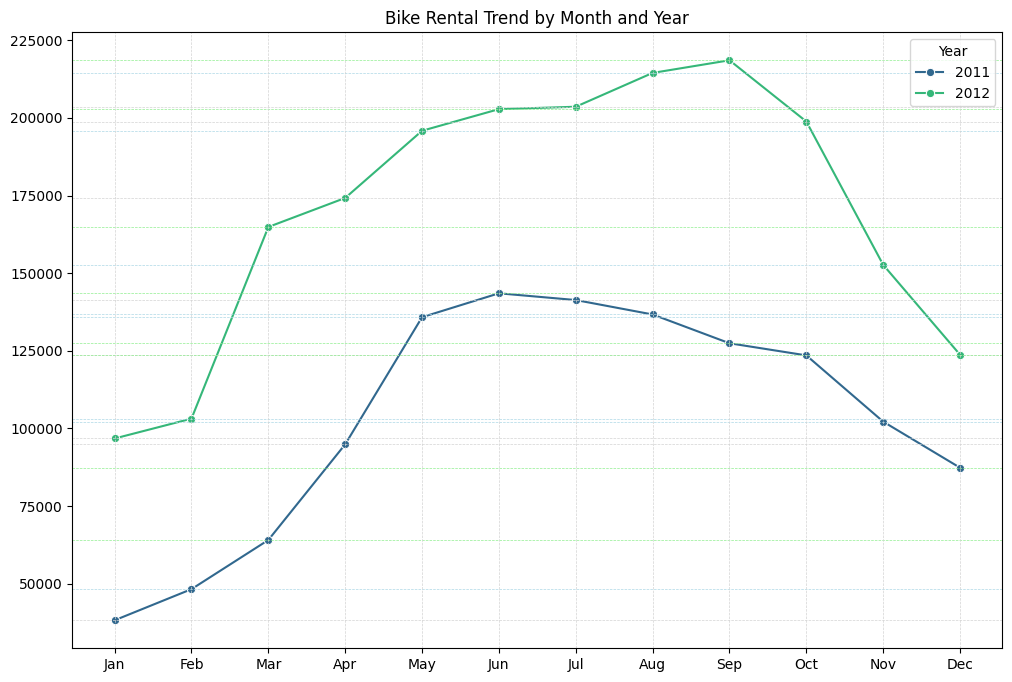

In [174]:
agg_year_month_df = day_df.groupby(by=['yr', 'mnth']).agg({
	'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=agg_year_month_df, x='mnth', y='cnt', hue='yr', marker='o', errorbar=None, palette='viridis')

plt.title('Bike Rental Trend by Month and Year')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', labels=['2011', '2012'])

# add horizontal line for each point
line_colors = ['lightgrey', 'lightblue', 'lightgreen']
for index, row in agg_year_month_df.iterrows():
	color = line_colors[index % len(line_colors)]
	plt.axhline(y=row['cnt'], color=color, linestyle='--', linewidth=0.5)
 
# add vertical line for each month
for month in range(1, 13):
	plt.axvline(x=month, color='lightgrey', linestyle='--', linewidth=0.5)

plt.show()

Based on the plotted visualization above, it can be concluded that there is a *significant increase in the number of bike rental users from 2011 to 2012*. Initially, in January 2011, the number of users was the lowest, then it increased significantly in May. Approaching January 2012, there was a decrease, but then it increased again in March until it *peaked in September 2012*. There was then another decrease towards December.

### Pertanyaan 2: How does the season affect the number of bike rentals, both casual and registered?

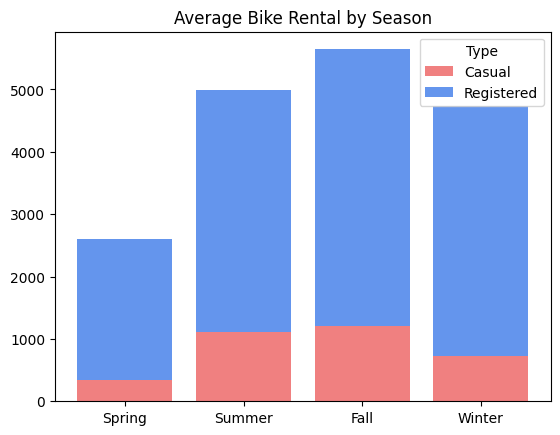

In [175]:
agg_season_df = day_df.groupby(by='season').agg({
	'casual': 'mean',
	'registered': 'mean'
}).reset_index()

plt.bar(agg_season_df['season'], agg_season_df['casual'], label='Casual', color='lightcoral')
plt.bar(agg_season_df['season'], agg_season_df['registered'], label='Registered', bottom=agg_season_df['casual'], color='cornflowerblue')

plt.title('Average Bike Rental by Season')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(ticks=range(1, 5), labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.legend(title='Type')

plt.show()


Based on the visualization above, it can be concluded that the highest average number of bike rental users occurs in the fall season, followed by summer, winter, and the lowest in the spring season. Prior exploration indicates that during the fall season, the average temperature is higher compared to other seasons, which also implies generally good/clear weather during that season.

Note that, as explained previously in **Concern** part, there might be a mistake in the description of the season labels, so the highest average number of rental users should occur in the summer season, while the lowest should occur in the winter season.

### Pertanyaan 3: What is the comparison of bike rental usage between days of the week, between holiday and non-holiday, and between workingday and non-workingday?

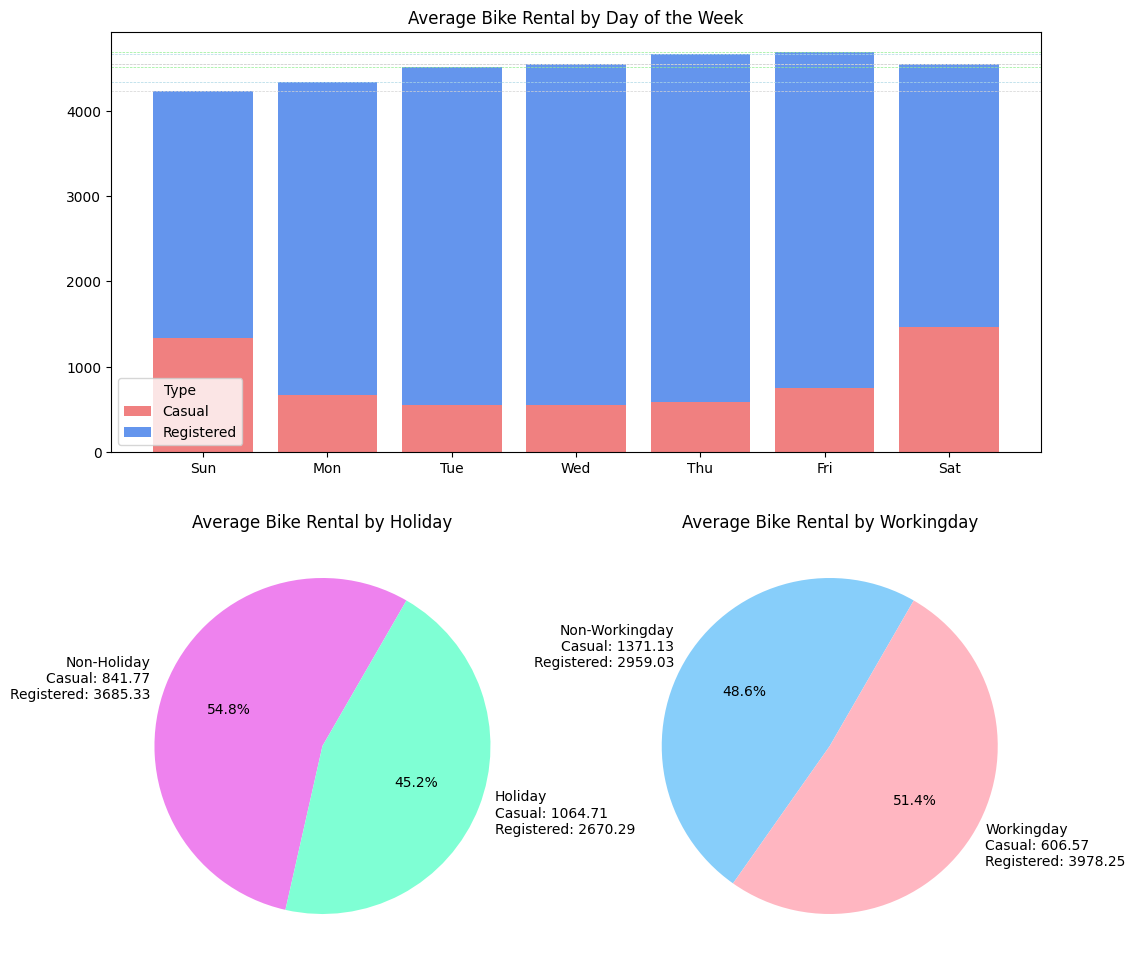

In [176]:
fig = plt.figure(figsize=(12, 12))

# bar comparison between days of the week
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
agg_weekday_df = day_df.groupby(by='weekday').agg({
	'casual': 'mean',
	'registered': 'mean'
}).reset_index()

ax1.bar(agg_weekday_df['weekday'], agg_weekday_df['casual'], label='Casual', color='lightcoral')
ax1.bar(agg_weekday_df['weekday'], agg_weekday_df['registered'], label='Registered', bottom=agg_weekday_df['casual'], color='cornflowerblue')

ax1.set_title('Average Bike Rental by Day of the Week')
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks(ticks=range(0, 7))
ax1.set_xticklabels(labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.legend(title='Type')
# add horizontal line for each point
line_colors = ['lightgrey', 'lightblue', 'lightgreen']
for index, row in agg_weekday_df.iterrows():
	color = line_colors[index % len(line_colors)]
	ax1.axhline(y=row['casual']+row['registered'], color=color, linestyle='--', linewidth=0.5)

# pie chart average comparison between holiday and non-holiday
ax2 = plt.subplot2grid((2, 2), (1, 0))
agg_holiday_df = day_df.groupby(by='holiday').agg({
	'cnt': 'mean',
	'casual': 'mean',
	'registered': 'mean'
}).reset_index()

ax2.pie(agg_holiday_df['cnt'], labels=['Non-Holiday\nCasual: {:.2f}\nRegistered: {:.2f}'.format(agg_holiday_df.loc[0, 'casual'], agg_holiday_df.loc[0, 'registered']), 'Holiday\nCasual: {:.2f}\nRegistered: {:.2f}'.format(agg_holiday_df.loc[1, 'casual'], agg_holiday_df.loc[1, 'registered'])], autopct='%1.1f%%', startangle=60, colors=['violet', 'aquamarine'])
ax2.set_title('Average Bike Rental by Holiday')

# pie chart average comparison between workingday and non-workingday
ax3 = plt.subplot2grid((2, 2), (1, 1))
agg_workingday_df = day_df.groupby(by='workingday').agg({
	'cnt': 'mean',
	'casual': 'mean',
	'registered': 'mean'
}).reset_index()

ax3.pie(agg_workingday_df['cnt'], labels=['Non-Workingday\nCasual: {:.2f}\nRegistered: {:.2f}'.format(agg_workingday_df.loc[0, 'casual'], agg_workingday_df.loc[0, 'registered']), 'Workingday\nCasual: {:.2f}\nRegistered: {:.2f}'.format(agg_workingday_df.loc[1, 'casual'], agg_workingday_df.loc[1, 'registered'])], autopct='%1.1f%%', startangle=60, colors=['lightskyblue', 'lightpink'])
ax3.set_title('Average Bike Rental by Workingday')

plt.show()


Based on the visualization above, it can be concluded that the highest average bike rental usage occurs on Fridays, followed by Thursdays, Saturdays, Wednesdays, Tuesdays, Mondays, and the lowest on Sundays.

Next, bike rental usage is higher on non-holiday days and slightly more on working days. Overall, this trend is dominated by registered users.

Furthermore, when considering the distribution between casual and registered users, casual users are more prevalent on holiday and non-working days, while registered users are more dominant on non-holidays and working days.

### Pertanyaan 4: What is the impact of weather conditions, temperature, humidity, and wind speed, on the bike rental rate?

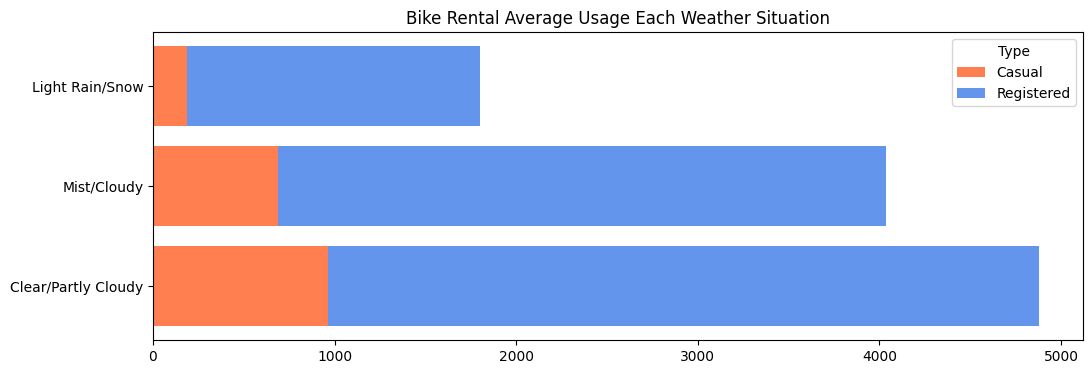

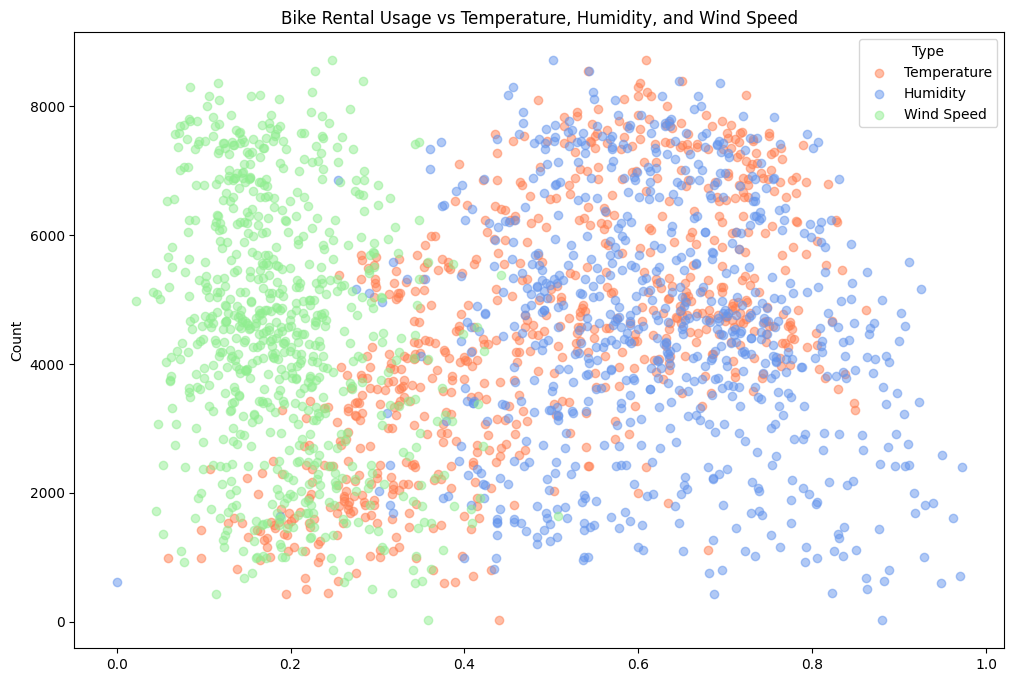

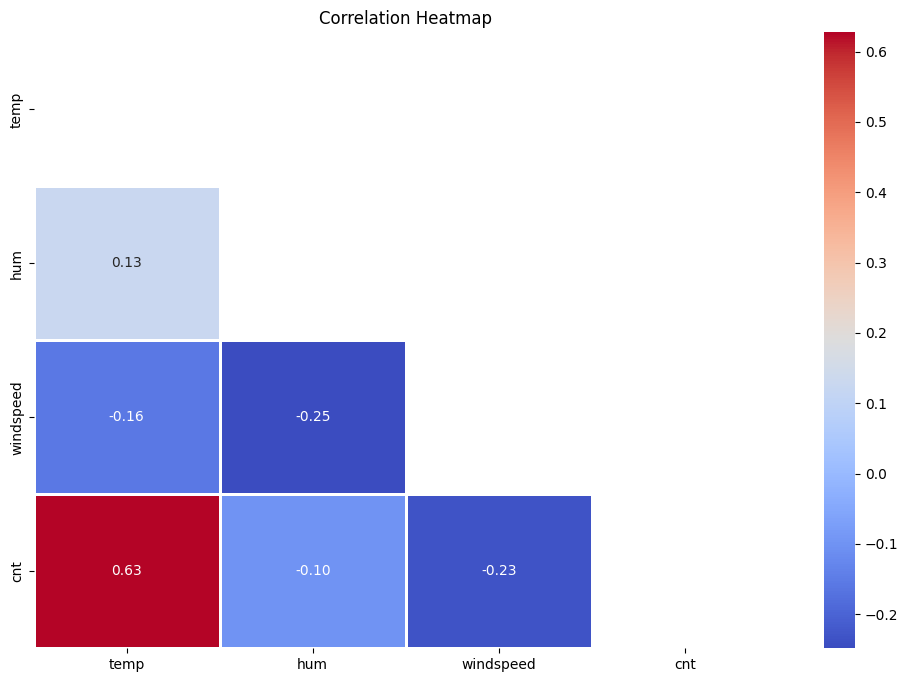

In [177]:
# group by weather situation, calculate the mean of casual and registered users. Then, visualize the result.
count_weather = day_df.groupby(by='weathersit').agg({
	'casual': 'mean',
	'registered': 'mean'
}).reset_index()

count_weather['total'] = count_weather['casual'] + count_weather['registered']
count_weather = count_weather.sort_values(by='total', ascending=True)

plt.figure(figsize=(12, 4))
plt.barh(count_weather['weathersit'], count_weather['casual'], label='Casual', color='coral')
plt.barh(count_weather['weathersit'], count_weather['registered'], label='Registered', left=count_weather['casual'], color='cornflowerblue')

plt.title('Bike Rental Average Usage Each Weather Situation')
plt.xlabel(None)
plt.ylabel(None)
plt.yticks(ticks=range(1, 4), labels=['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Rain/Snow'])
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.legend(title='Type')

plt.show()

# visualize the impact of temperature, humidity, and wind speed on bike rental usage using scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(day_df['temp'], day_df['cnt'], label='Temperature', color='coral', alpha=0.5)
plt.scatter(day_df['hum'], day_df['cnt'], label='Humidity', color='cornflowerblue', alpha=0.5)
plt.scatter(day_df['windspeed'], day_df['cnt'], label='Wind Speed', color='lightgreen', alpha=0.5)

plt.title('Bike Rental Usage vs Temperature, Humidity, and Wind Speed')
plt.xlabel(None)
plt.ylabel('Count')
plt.legend(title='Type')

plt.show()

# Easier to see the correlation each feature with cnt using heatmap
columns = ['temp','hum', 'windspeed', 'cnt']
corr = day_df[columns].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

Based on the visualizations above, we can conclude that the highest average bike rental usage occurs during clear or partly cloudy weather conditions, followed by mist or cloudy conditions, and the lowest during light rain or snow. This indicates that weather significantly impacts the bike rental rate.

Additionally, when examining the scatter plot depicting the impact of temperature, humidity, and wind speed on bike rental usage, it appears that temperature has a more apparent positive correlation with rental count compared to humidity and wind speed.

Moreover, the correlation heatmap confirms these findings, showing a relatively strong positive correlation between temperature and rental count (0.63), while humidity (-10) and wind speed (-23) exhibit weaker correlations.

These observations suggest that weather conditions, particularly temperature, play a crucial role in influencing bike rental rates.

### Pertanyaan 5: What is the distribution of bike rental per hour between days of the week and between seasons?

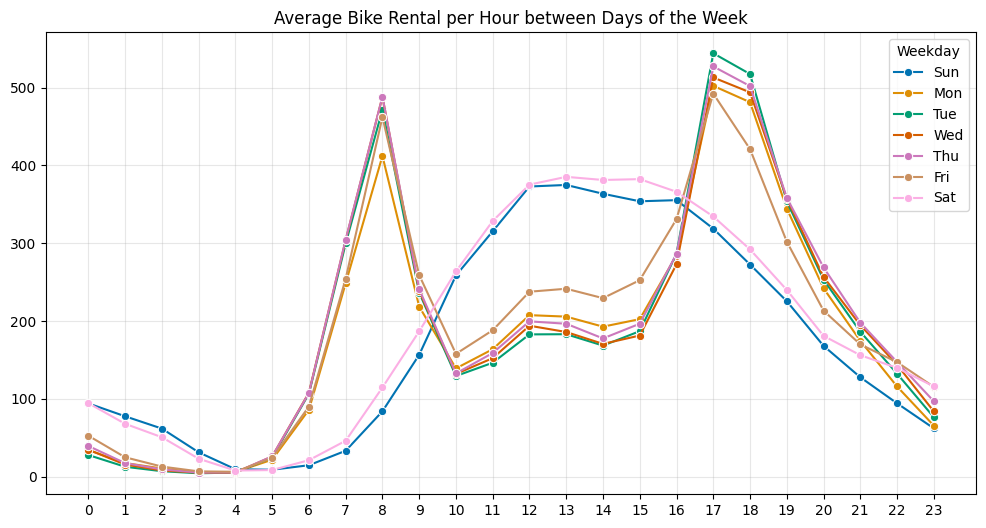

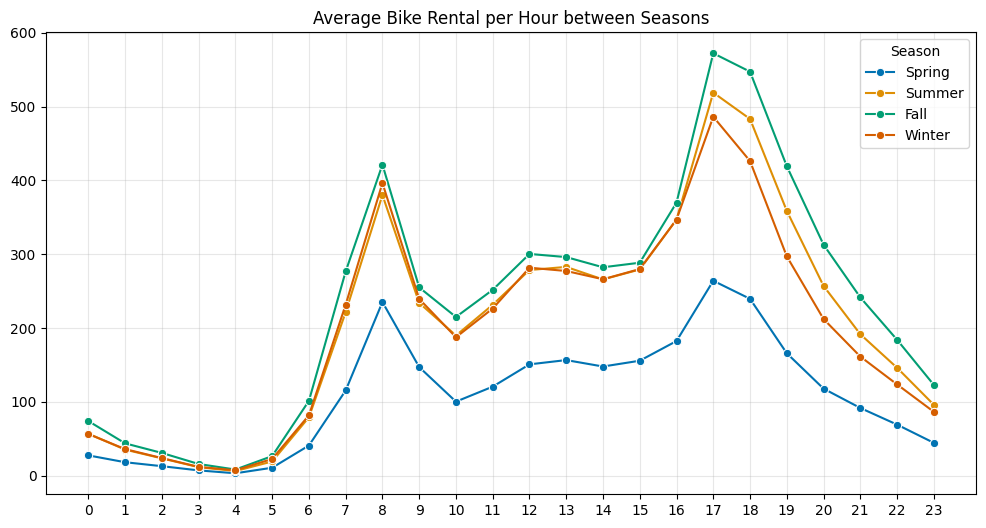

In [178]:
# plot the distribution of bike rental per hour between days of the week
agg_hour_weekday_df = hour_df.groupby(by=['hr', 'weekday']).agg({
	'cnt': 'mean'
}).reset_index()

plt.subplots(figsize=(12, 6))
sns.lineplot(data=agg_hour_weekday_df, x='hr', y='cnt', hue='weekday', marker='o', palette='colorblind', errorbar=None)

plt.title('Average Bike Rental per Hour between Days of the Week')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(ticks=range(0, 24))
plt.legend(title='Weekday', labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(alpha=0.3)

plt.show()

# plot the distribution of bike rental per hour between seasons, hue season
agg_hour_season_df = hour_df.groupby(by=['hr', 'season']).agg({
	'cnt': 'mean'
}).reset_index()

plt.subplots(figsize=(12, 6))
sns.lineplot(data=agg_hour_season_df, x='hr', y='cnt', hue='season', marker='o', palette='colorblind', errorbar=None)

plt.title('Average Bike Rental per Hour between Seasons')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(ticks=range(0, 24))
plt.legend(title='Season', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(alpha=0.3)

plt.show()

Based on the visualizations above, we can observe the distribution of bike rentals per hour both across days of the week and across seasons.

On weekdays (excluding Saturday and Sunday), there is a significant surge in bike rental usage around 8 in the morning, followed by another peak during late afternoon hours, around 5 to 6 PM. This pattern resembles two sharp peaks, reminiscent of cat ears.

However, Saturdays and Sundays exhibit a different pattern. Bike rental usage gradually increases from 7 AM, reaching its peak around noon, and then gradually decreases until midnight. This pattern forms a rounded mountain shape, neither too steep nor too flat.

The rental usage patterns across seasons show similar shapes, albeit differing in heights. Fall season displays the highest average bike rental usage, while spring season shows the lowest.

Note that, as explained previously in **Concern** part, there might be a mistake in the description of the season labels, if there were, then the highest average bike rental usage should occur in the summer season, while the lowest should be in winter.

## Conclusion

- Conclution pertanyaan 1
	- Based on the plotted visualization above, it can be concluded that there is a *significant increase in the number of bike rental users from 2011 to 2012*. Initially, in January 2011, the number of users was the lowest, then it increased significantly in May. Approaching January 2012, there was a decrease, but then it increased again in March until it *peaked in September 2012*. There was then another decrease towards December.
	- In 2011, the average bike rental usage was 3405.76 per day, while in 2012, there was an increase to an average of 5599.93 rentals per day.
	
- Conclution pertanyaan 2
	- Based on the visualization above, it can be concluded that the highest average number of bike rental users occurs in the fall season, followed by summer, winter, and the lowest in the spring season. Prior exploration indicates that during the fall season, the average temperature is higher compared to other seasons, which also implies generally good/clear weather during that season.
	- During the Fall season, the highest average bike rental usage was 5644.30 per day, whereas in the Spring season, it was the lowest at 2604.13 per day.
	- Note that, as explained previously in **Concern** part, there might be a mistake in the description of the season labels, so the highest number of rental users should occur in the summer season, while the lowest should occur in the winter season.

- Conclution pertanyaan 3
	- Based on the visualization above, it can be concluded that the highest average bike rental usage occurs on Fridays, followed by Thursdays, Saturdays, Wednesdays, Tuesdays, Mondays, and the lowest on Sundays.
	- On Fridays, the highest average bike rental usage was 4690.29 per day, while on Sundays, it was the lowest at 4228.83 per day.
	- Next, bike rental usage is higher on non-holiday days and slightly more on working days. Overall, this trend is dominated by registered users.
	- Furthermore, when considering the distribution between casual and registered users, casual users are more prevalent on holiday and non-working days, while registered users are more dominant on non-holidays and working days.

- Conclution pertanyaan 4
	- Based on the visualizations above, we can conclude that the highest average bike rental usage occurs during clear or partly cloudy weather conditions, followed by mist or cloudy conditions, and the lowest during light rain or snow. This indicates that weather significantly impacts the bike rental rate.
	- During clear/partly cloudy weather, the highest average bike rental usage was 4876.79 per day, followed by mist/cloudy conditions at 4035.86 per day, and the lowest was during light rain/snow at 1803.29 per day.
	- Additionally, when examining the scatter plot depicting the impact of temperature, humidity, and wind speed on bike rental usage, it appears that temperature has a more apparent positive correlation with rental count compared to humidity and wind speed.
	- Moreover, the correlation heatmap confirms these findings, showing a relatively strong positive correlation between temperature and rental count (0.63), while humidity (-10) and wind speed (-23) exhibit weaker correlations.
	- These observations suggest that weather conditions, particularly temperature, play a crucial role in influencing bike rental rates.

- Conclution pertanyaan 5
	- Based on the visualizations above, we can observe the distribution of bike rentals per hour both across days of the week and across seasons.
	- On weekdays (excluding Saturday and Sunday), there is a significant surge in bike rental usage around 8 in the morning, followed by another peak during late afternoon hours, around 5 to 6 PM. This pattern resembles two sharp peaks, reminiscent of cat ears.
	- However, Saturdays and Sundays exhibit a different pattern. Bike rental usage gradually increases from 7 AM, reaching its peak around noon, and then gradually decreases until midnight. This pattern forms a rounded mountain shape, neither too steep nor too flat.
	- The rental usage patterns across seasons show similar shapes, albeit differing in heights. Fall season displays the highest average bike rental usage, while spring season shows the lowest.
	- Note that, as explained previously in **Concern** part, there might be a mistake in the description of the season labels, if there were, then the highest average bike rental usage should occur in the summer season, while the lowest should be in winter.